# Turing Machine and Deep Learning

## Assignment 4 -- Neural Networks

This notebook is meant for you to review and reflect on the content of Lecture 4, which was mainly about neural networks. In particular, we'll focus on aspects that were only briefly mentioned in class in order for you to get a better understanding of it.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 4" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.

In [3]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer
import tensorflow as tf            # NNs and associated
from tensorflow import keras       # NNs and associated

# Q1 CNNs

In the lecture, we saw some code that implemented MLPs and CNNs for the task of image classification on CIFAR10. However, we skipped over some details of what CNNs actually do.

A CNN works by automatically learning and extracting meaningful patterns, features, and hierarchies from the input data in the following way:

1. **Convolution**: A CNN applies (multiple) small filters (kernels) to an input image, performing element-wise multiplications and sums to extract features like edges, corners, and textures. We also did this computation in person during class. These kernels may be a matrix (what we saw in the lecture), or even a stack of matrices (e.g. for RGB images). I'd recommend watching this [3Blue1Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA&pp=ygUTY29udm9sdXRpb25zIGluIGNubg%3D%3D) and this [DeepLearning.AI](https://www.youtube.com/watch?v=KTB_OFoAQcc) video for reference.
2. **Non-linearity**: Non-linear activation functions (e.g., ReLU) are applied to introduce complexity and allows the capture of more abstract representations.
3. **Pooling**: Pooling operations are used to downsample the spatial dimensions of feature maps while preserving the most important information. In both cases, a pooling window or filter moves across the input feature map, and a single value is selected or computed within the window based on the pooling operation. Pooling helps reduce the computational complexity of the network and introduces some translation invariance. There are a few types of pooling, but most commonly used are max-pooling and average-pooling.
4. **Hierarchy**: Convolution and pooling operations are repeated to create a hierarchy of feature extraction layers, learning more complex and high-level features.
5. **Fully Connected Layers**: Flattened features are passed through fully connected layers, similar to a traditional MLP, for classification or regression.
6. **Training**: Parameters are adjusted using backpropagation and optimization algorithms to minimize the difference between predictions and true labels.

By leveraging convolution, non-linearity, and hierarchical feature extraction, CNNs can automatically learn and recognize intricate patterns and structures in visual data, making them well-suited for tasks like image classification and object detection.

You can think of the convolution operation with a kernel over an image as outputting a new modified image, called a feature map. When applying convolutions over feature maps, the size of the output feature map (in each dimension) can be computed by:

$$o = \frac{i - k + 2 p}{s}+1$$

where the hyperparameters of the convolution are:
- $i$: input_size is the size (height or width) of the input feature map.
- $k$: kernel_size is the size (height or width) of the convolutional kernel/filter.
- $p$: padding is the number of pixels added to each side of the input feature map (if applicable) (default 0)
- $s$: stride is the step size or the number of pixels the kernel moves at each step (default 1)

The output size of a pooling operation can also be defined as:
$$o = \frac{i - p}{s} + 1$$

**Q1.1** Thus, starting with a 28x28 pixel image (e.g. MNIST), write a series of kernel sizes to use in convolutions (optionally including a pooling operation if you want to try it out, and optionally padding and stride) in order to get it down to an image size of 6x6. There are several correct answers possible here.

1. First I highlight important features of the image using a convultion: a 3x3 kernel, 1 pixel padding, and stride of 1, maintaining the size at 28x28.

2. Next I reduce the size of the image: Pooling with a 2x2 kernel and stride of 2, reducing the size to 14x14.

3. Using another convulution I highlight the most important features of the simplified image: 3x3 kernel, 1 pixel padding, and stride of 1

4. I further reduce the image by pooling again with a 2x2 kernel and stride of 2, reducing the size to 7x7.

5. A final convolution with a 2x2 kernel, no padding, and a stride of 1, reduces the size of the image from 7x7 to 6x6.

**Q1.2** Now, let's try out your strategy in code. Implement the convolutions you defined above to perform classification over MNIST digits. Note that most of the code is written for you, but be mindful of the steps that are written. Note that you need to choose the number of kernals as well as the size at each layer. The input shape of your next layer is the output shape you computed above and the number of kernels you chose for the previous layer ``input_shape=(w,h,k)``.

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# TODO: Complete this cell

# A Conv2D layer performs 2D convolution -- the same as we saw in class.
# The main inputs to this class are the number of kernels, the size of each kernel,
# the non-linear activation function and the input shape. Optionally, you can define a padding
# and/or a stride. Use it like this:
# keras.layers.Conv2D(<n_kernels>,
#                     kernel_size=<tuple>,
#                     activation=<string>,
#                     input_shape=<tuple>,
#                     padding=<string>,
#                     stride=<int/tuple>)
# You can read the documentation here: https://keras.io/api/layers/convolution_layers/convolution2d/

# Build the model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1), padding='same'), # i'll give you the first shape for free
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(128, kernel_size=(2, 2), activation='relu', strides=1),# add more layers here if you need to
    keras.layers.Flatten(),                            # flatten to dense layer for classification
    keras.layers.Dense(128, activation='relu'),           # add dense layer (add more if you want)
    keras.layers.Dense(10, activation='softmax')      # final dense layer (how many categories are there?).
                                                       # softmax for probability distribution output
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model: choose batch size and number of epochs
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1500/1500 [==============================] - 83s 54ms/step - loss: 0.1355 - accuracy: 0.9581 - val_loss: 0.0447 - val_accuracy: 0.9874
Epoch 2/10
1500/1500 [==============================] - 97s 65ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0383 - val_accuracy: 0.9884
Epoch 3/10
1500/1500 [==============================] - 119s 79ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0405 - val_accuracy: 0.9883
Epoch 4/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0400 - val_accuracy: 0.9899
Epoch 5/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0452 - val_accuracy: 0.9872
Epoch 6/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0449 - val_accuracy: 0.9879
Epoch 7/10
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0391 

**Q1.3** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

***The training and validation loss at first decrease sharply together. However, after epoch 1 the training loss keeps on decreasing while the validation loss remains fairly stable. This points towards overfitting for epochs greater than 1. Given that the training accuracy seems to flatten out after epoch 1 and the model already preforming quite well it seems unlikely that training it further would provide large benefits. I would thus stop training.    ***

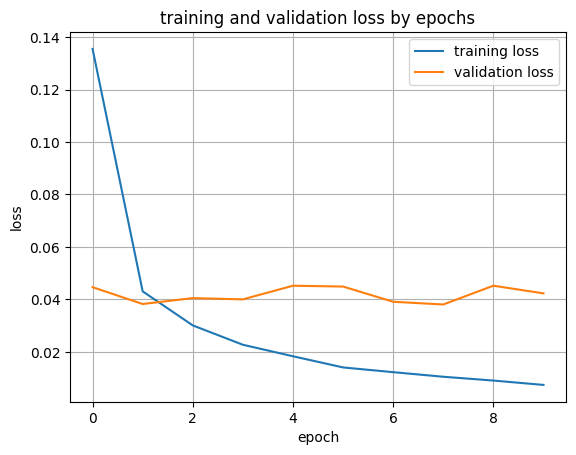

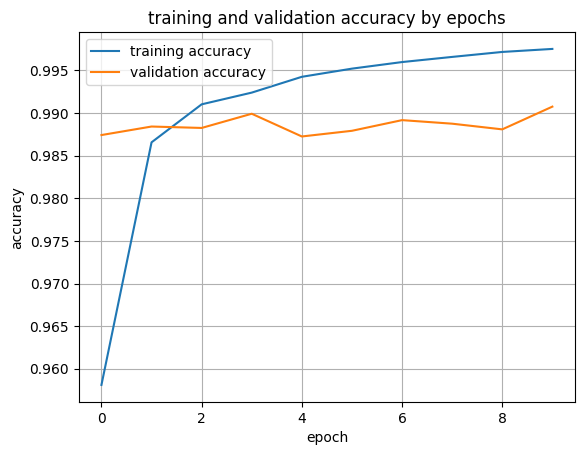

In [ ]:
# plot losses
plt.plot(history.history["loss"], label='training loss') # plot loss
plt.plot(history.history["val_loss"], label='validation loss') # plot val_loss
plt.ylabel('loss')
plt.xlabel('epoch') # x-axis=epochs
plt.grid(True)
plt.legend()
plt.title('training and validation loss by epochs')
plt.show()

# plot accuracies
plt.plot(history.history["accuracy"], label='training accuracy') # plot accuracy
plt.plot(history.history["val_accuracy"], label='validation accuracy') # plot val_accuracy
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend()
plt.title('training and validation accuracy by epochs')
plt.show()

# Q2 RNNs

An RNN (Recurrent Neural Network) is a type of artificial neural network that is particularly effective in processing sequential data. Unlike feedforward neural networks, which process inputs independently, RNNs have connections that allow information to flow in cycles. This cyclic connectivity enables them to capture temporal dependencies and learn patterns over time. You can find more in these [neural network lecture notes (Jaeger 2023, chapter 4)](https://www.ai.rug.nl/minds/uploads/LN_NN_RUG.pdf). Here is an overview of how RNNs work:

- **Recurrent Connections**: RNNs have recurrent connections that allow information to be passed from one step to the next in a sequence. At each time step, the RNN takes an input and combines it with the information from the previous step. This feedback loop enables the network to have memory and make predictions based on the context of past inputs.

- **Hidden State**: RNNs maintain a hidden state vector that serves as a memory of the network. The hidden state is updated at each time step and contains information about the previous inputs in the sequence. It captures the network's understanding of the sequence up to that point and is used to influence the processing of future inputs.

- **Sequence Processing**: RNNs process sequences by iterating through each element one at a time. As the network receives an input at each time step, it updates its hidden state based on the input and the previous hidden state. The updated hidden state is then used to make predictions or generate outputs.

- **Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU)**: LSTMs and GRUs are popular types of RNN architectures that address the vanishing gradient problem and capture long-term dependencies more effectively. These architectures introduce specialized memory cells and gating mechanisms that allow the network to selectively update and forget information.

- **Training**: RNNs are typically trained using the backpropagation through time (BPTT) algorithm, which extends backpropagation to handle sequences. The goal is to minimize the difference between the predicted outputs and the true targets by adjusting the network's parameters through gradient descent optimization.

- **Applications**: RNNs are well-suited for tasks involving sequential data, such as natural language processing, speech recognition, machine translation, time series analysis, and sentiment analysis. They can effectively model dependencies and capture context in these domains.

By leveraging recurrent connections and hidden state information, RNNs excel at processing and understanding sequential data. They are powerful tools for tasks that require temporal modeling and have made significant contributions to the field of deep learning.

Here, we'll use LSTMs to regress on the [Air Passengers](https://www.kaggle.com/datasets/chirag19/air-passengers) dataset, providing monthly totals of a US airline passengers from 1949 to 1960.

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
data = pd.read_csv('/content/AirPassengers - 2024.csv')
time_series = data['#Passengers'].values.astype(float)

# preprocess, use a scaler to scale the features to 0 and 1
time_series = np.array(time_series).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series = scaler.fit_transform(time_series)

# Split the data into training and testing sets
train_data = time_series[:120]  # First 120 months for training
test_data = time_series[120:]   # Last 24 months for testing

# Function to create input sequences
# Goal: Predict the (n+1)th point given n points
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create input sequences
sequence_length = 6
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the input data to be 3D (batch_size, sequence_length, num_features)
# Standard practice!
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q2.1** Finish the following cell

In [10]:
# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, 1)),
    keras.layers.Dense(1) # how many outputs in this regression task?
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam') # use MSE loss and Adam optimizer. If you don't know how, look it up!
history = model.fit(X_train, y_train, epochs=30, batch_size=30, validation_split=0.2)

Epoch 1/30
4/4 [==============================] - 3s 188ms/step - loss: 0.1086 - val_loss: 0.3926
Epoch 2/30
4/4 [==============================] - 0s 15ms/step - loss: 0.0798 - val_loss: 0.3041
Epoch 3/30
4/4 [==============================] - 0s 18ms/step - loss: 0.0568 - val_loss: 0.2331
Epoch 4/30
4/4 [==============================] - 0s 13ms/step - loss: 0.0389 - val_loss: 0.1747
Epoch 5/30
4/4 [==============================] - 0s 14ms/step - loss: 0.0261 - val_loss: 0.1281
Epoch 6/30
4/4 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0911
Epoch 7/30
4/4 [==============================] - 0s 16ms/step - loss: 0.0140 - val_loss: 0.0594
Epoch 8/30
4/4 [==============================] - 0s 15ms/step - loss: 0.0136 - val_loss: 0.0388
Epoch 9/30
4/4 [==============================] - 0s 14ms/step - loss: 0.0151 - val_loss: 0.0333
Epoch 10/30
4/4 [==============================] - 0s 14ms/step - loss: 0.0150 - val_loss: 0.0360
Epoch 11/30
4/4 [===========

**Q2.2** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

**Given that the validation loss seems to largely follow the trend of the training loss it seems unlikely for there to be overfitting. Given that both the training and validation loss see a stable loss after epoch 15 there doesn't seem to be a good reason to keep on training. **

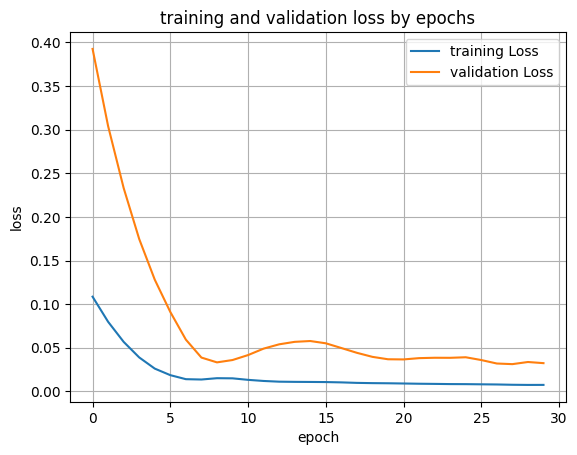

In [11]:
# Plotting training and validation losses
plt.plot(history.history["loss"], label='training Loss') # plot loss
plt.plot(history.history["val_loss"], label='validation Loss') # plot val_loss
plt.ylabel('loss')
plt.xlabel('epoch') # x-axis=epochs
plt.grid(True)
plt.legend()
plt.title('training and validation loss by epochs')
plt.show()


Now, we can make predictions on our test set and evaluate it!

**Q2.3** Finish the following cell

1/1 [==============================] - 0s 22ms/step


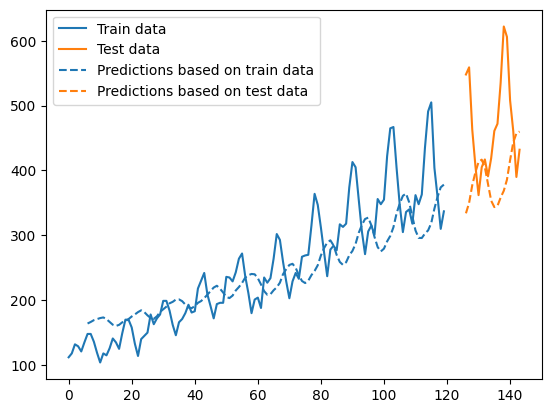

Train Score: 3312.56 (MSE)
Test Score: 16228.81 (MSE)


In [12]:
# Predict on the test set
# make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# invert predictions to make it original scale
train_preds = scaler.inverse_transform(train_preds)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_preds = scaler.inverse_transform(test_preds)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# plotting code adapted from https://www.kaggle.com/code/singhalamogh/lstm-regression-on-time-series-data
# shift train predictions for plotting
trainPredictPlot = np.empty_like(time_series)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_preds) + sequence_length, :] = train_preds

# shift test true data for plotting
testTruePlot = np.empty_like(time_series)
testTruePlot[:, :] = np.nan
testTruePlot[len(train_preds)+(sequence_length*2):len(time_series), :] = y_test

# shift test predictions for plotting
testPredictPlot = np.empty_like(time_series)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+2*sequence_length:len(time_series), :] = test_preds

# plot baseline and predictions
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(scaler.inverse_transform(train_data), color=colors[0], label="Train data")
plt.plot(testTruePlot[:,0], color=colors[1], label="Test data")
plt.plot(trainPredictPlot[:,0], color=colors[0], linestyle="--", label="Predictions based on train data")
plt.plot(testPredictPlot[:,0], color=colors[1], linestyle="--", label="Predictions based on test data")
plt.legend()
plt.show()

# calculate root mean squared error
train_score = mean_squared_error(y_train, train_preds)
print('Train Score: %.2f (MSE)' % (train_score))
test_score = mean_squared_error(y_test, test_preds)
print('Test Score: %.2f (MSE)' % (test_score))

**Q2.4** Does the model do well? Write three ideas on how you would make it better. Implement at least one of these ideas and rerun your code, and report your results.

Since both the train and test MSE are very large, especially the train MSE, the model doesn't seem to do well.

Three possible ways to improve the model:
1. Increasing the model complexity by either increasing the number of neurons or the number of LSTM layers. This could possibly help the model capture the pattern of the data.

2. Increasing the lookback window as to increase the number of past time steps to predict future time steps. This can be implemented by adjusting the variable "sequence_length

3. Adjusting the training of parameters of the model. This can be done by increasing/decreasing the batch size and/or the epochs of the model

The code below implements the 2nd proposal to improve the model:

1/1 [==============================] - 0s 21ms/step


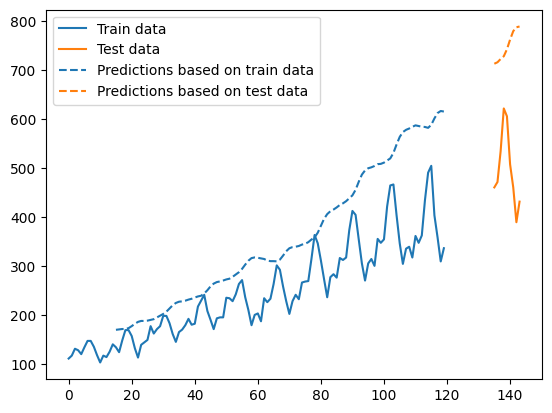

Train Score: 14491.84 (MSE)
Test Score: 71144.09 (MSE)


In [13]:
#increasing the sequence length from 6 to 15
sequence_length = 15
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Predict on the test set
# make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# invert predictions to make it original scale
train_preds = scaler.inverse_transform(train_preds)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_preds = scaler.inverse_transform(test_preds)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# plotting code adapted from https://www.kaggle.com/code/singhalamogh/lstm-regression-on-time-series-data
# shift train predictions for plotting
trainPredictPlot = np.empty_like(time_series)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_preds) + sequence_length, :] = train_preds

# shift test true data for plotting
testTruePlot = np.empty_like(time_series)
testTruePlot[:, :] = np.nan
testTruePlot[len(train_preds)+(sequence_length*2):len(time_series), :] = y_test

# shift test predictions for plotting
testPredictPlot = np.empty_like(time_series)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+2*sequence_length:len(time_series), :] = test_preds

# plot baseline and predictions
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(scaler.inverse_transform(train_data), color=colors[0], label="Train data")
plt.plot(testTruePlot[:,0], color=colors[1], label="Test data")
plt.plot(trainPredictPlot[:,0], color=colors[0], linestyle="--", label="Predictions based on train data")
plt.plot(testPredictPlot[:,0], color=colors[1], linestyle="--", label="Predictions based on test data")
plt.legend()
plt.show()

# calculate root mean squared error
train_score = mean_squared_error(y_train, train_preds)
print('Train Score: %.2f (MSE)' % (train_score))
test_score = mean_squared_error(y_test, test_preds)
print('Test Score: %.2f (MSE)' % (test_score))

# Q3 NLPs

The guest lecturer of week 5 will talk about natural language processing (NLPs). To prepare for this please watch the following videos and per video tell us one thing you learned.

Videos
Intro (5 minutes); https://www.youtube.com/watch?v=CMrHM8a3hqw

Transform & Bert (10 minutes); https://www.youtube.com/watch?v=SZorAJ4I-sA

Optional; Transform (13 minutes) (more in depth); https://www.youtube.com/watch?v=TQQlZhbC5ps

That NLP refers to the branch of AI that gives machines the ability to read, understand and derive meaning from human languages.

RNN's aren't good at handling text as they are bad at remembering and hard to train.

Transformers allow inputs sequences to be passed in parallel.

